In [1]:
from dask.distributed import LocalCluster, Client
import time
import dask.array as da

cluster = LocalCluster()
client = Client(cluster)

x = da.random.random((100000, 100000), chunks=(2000, 2000))
y = x + x.T
z = y[::2, 5000:].mean(axis=1)

In [3]:
print(client.scheduler_info()['services'])

{'dashboard': 8787}


In [4]:
x

,Array,Chunk
Bytes,80.00 GB,32.00 MB
Shape,"(100000, 100000)","(2000, 2000)"
Count,2500 Tasks,2500 Chunks
Type,float64,numpy.ndarray


In [5]:
result = z.compute()
print(result)


KeyboardInterrupt



In [6]:
cluster.close()

distributed.client - ERROR - Failed to reconnect to scheduler after 10.00 seconds, closing client
_GatheringFuture exception was never retrieved
future: <_GatheringFuture finished exception=CancelledError()>
asyncio.exceptions.CancelledError


In [5]:
from dask import delayed
@delayed
def inc(x):
    return x + 1
@delayed
def add(x, y):
    return x + y

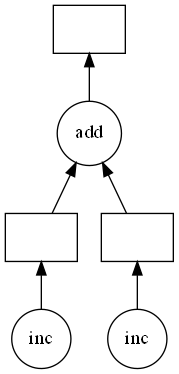

In [6]:
x = inc(15)
y = inc(30)
total = add(x, y)

#visualize DAG
total.visualize()

In [7]:
total.compute()

47

In [8]:
from dask import delayed
def inc(x):
    return x + 1
def dec(x):
    return x - 1
def add(x, y):
    return x + y

In [9]:
from dask.distributed import Client
c = Client(n_workers=4)
x = c.submit(inc, 1)
y = c.submit(dec, 2)
total = c.submit(add, x, y)

C:\Users\julian.auriac\.conda\envs\pourDask\lib\site-packages\distributed\node.py:151: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 62195 instead
  warnings.warn(


In [10]:
total.result()

3

In [ ]:
from dask.distributed import as_completed
def func(x):
    y = y + x
    return y
futures = [c.submit(func, x) for x in range(n)]
iterator = as_completed(futures)
for res in iterator:
    print("RES Y :",res.result())

In [11]:
from dask.distributed import progress
# to show progress bar
progress(f)

NameError: name 'f' is not defined